In [109]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-0izytgw5
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-0izytgw5


In [110]:
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [112]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [113]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [114]:
dataset = pd.read_excel('/content/aus_weather_train.csv')
dataset.head(1)

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,124741.0,2011-08-07,SalmonGums,3.2,19.0,0.0,NE,31.0,N,NE,...,60.0,34.0,1017.64994,1015.255889,4.447461,4.50993,10.4,18.6,0.0,1.0


In [115]:
test = pd.read_excel('/content/aus_weather_test.csv')
test.head(1)

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,41959.0,2015-11-16,Williamtown,13.4,22.1,35.4,S,35.0,SW,SSE,...,22.0,73.0,55.0,1019.4,1018.0,3.0,1.0,18.9,21.4,1.0


<a name=section22></a>

### **2.2 Clean the Data**

- The dataset contains a few unknown values.

In [116]:
dataset.columns

Index(['Id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [117]:
dataset.isna().sum()

Id               0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

- Dropping these rows.

- The `"Origin"` column is categorical, not numeric.

- Converting that to a one-hot:

In [118]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset["Location"] = label_encoder.fit_transform(dataset["Location"])
dataset["WindDir9am"] = label_encoder.fit_transform(dataset["WindDir9am"])
dataset["WindGustDir"] = label_encoder.fit_transform(dataset["WindGustDir"])
dataset["WindDir3pm"] = label_encoder.fit_transform(dataset["WindDir3pm"])

test["Location"] = label_encoder.fit_transform(test["Location"])
test["WindDir9am"] = label_encoder.fit_transform(test["WindDir9am"])
test["WindGustDir"] = label_encoder.fit_transform(test["WindGustDir"])
test["WindDir3pm"] = label_encoder.fit_transform(test["WindDir3pm"])


In [119]:
dataset.head(1)

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,124741.0,2011-08-07,36,3.2,19.0,0.0,4,31.0,3,4,...,60.0,34.0,1017.64994,1015.255889,4.447461,4.50993,10.4,18.6,0.0,1.0


In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51003 entries, 0 to 51002
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             51003 non-null  float64       
 1   Date           51003 non-null  datetime64[ns]
 2   Location       51003 non-null  int64         
 3   MinTemp        51003 non-null  float64       
 4   MaxTemp        51003 non-null  float64       
 5   Rainfall       51003 non-null  float64       
 6   WindGustDir    51003 non-null  int64         
 7   WindGustSpeed  51003 non-null  float64       
 8   WindDir9am     51003 non-null  int64         
 9   WindDir3pm     51003 non-null  int64         
 10  WindSpeed9am   51003 non-null  float64       
 11  WindSpeed3pm   51003 non-null  float64       
 12  Humidity9am    51003 non-null  float64       
 13  Humidity3pm    51003 non-null  float64       
 14  Pressure9am    51003 non-null  float64       
 15  Pressure3pm    5100

<a name=section23></a>


### **2.3 Split the Data into Train and Test**

- Now we will split the dataset into a training set and a test set.

- We will use the test set in the final evaluation of our model.

In [121]:
train_dataset = dataset
train_dataset.drop('Date', axis = 1,inplace =True)

In [122]:
test_dataset = test
test_dataset.drop('Date',axis = 1, inplace =True)

<a name=section24></a>

### **2.4 Inspect the Data**

- We will have a quick look at the joint distribution of a few pairs of columns from the training set.

- Let's also look at the overall statistics:

In [123]:
train_labels = train_dataset.pop('RainTomorrow')

In [124]:
#test_labels = test_dataset.pop('RainTomorrow')

In [125]:
from sklearn import preprocessing

normed_train_data = preprocessing.normalize(train_dataset)
normed_test_data = preprocessing.normalize(test_dataset)


In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
final_train_data = sc.fit_transform(normed_train_data)
final_test_data = sc.fit(normed_test_data)

In [127]:
from tensorflow.keras import regularizers
def deep_nn():
    model = keras.Sequential([layers.Dense(256,kernel_regularizer=regularizers.l2(0.001),input_shape=[len(train_dataset.keys())]),
                          layers.ReLU(),
                        
                          layers.Dense(128,kernel_regularizer=regularizers.l2(0.001)),
                          layers.ReLU(),
                          layers.Dense(128,kernel_regularizer=regularizers.l2(0.001)),
                          layers.ReLU(),
                          layers.Dense(64,kernel_regularizer=regularizers.l2(0.001)),
                          layers.ReLU(),
                          layers.Dense(1, activation = 'sigmoid')])
    return model

In [128]:
# define model
model = deep_nn()

# define optimizer
sgd = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=sgd, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

# print model information
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 256)               5376      
                                                                 
 re_lu_40 (ReLU)             (None, 256)               0         
                                                                 
 dense_51 (Dense)            (None, 128)               32896     
                                                                 
 re_lu_41 (ReLU)             (None, 128)               0         
                                                                 
 dense_52 (Dense)            (None, 128)               16512     
                                                                 
 re_lu_42 (ReLU)             (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 64)              

In [129]:
start = time.time()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
model_info = model.fit(final_train_data, train_labels, batch_size=32, \
                       epochs=100, verbose=2, validation_split=0.2,callbacks=[tfdocs.modeling.EpochDots()])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Epoch 1/100

Epoch: 0, accuracy:0.7302,  loss:0.6486,  val_accuracy:0.7470,  val_loss:0.5713,  
.1276/1276 - 9s - loss: 0.6486 - accuracy: 0.7302 - val_loss: 0.5713 - val_accuracy: 0.7470 - 9s/epoch - 7ms/step
Epoch 2/100
.1276/1276 - 7s - loss: 0.5486 - accuracy: 0.7511 - val_loss: 0.5246 - val_accuracy: 0.7652 - 7s/epoch - 6ms/step
Epoch 3/100
.1276/1276 - 7s - loss: 0.5344 - accuracy: 0.7530 - val_loss: 0.5226 - val_accuracy: 0.7682 - 7s/epoch - 6ms/step
Epoch 4/100
.1276/1276 - 8s - loss: 0.5263 - accuracy: 0.7581 - val_loss: 0.5326 - val_accuracy: 0.7492 - 8s/epoch - 6ms/step
Epoch 5/100
.1276/1276 - 6s - loss: 0.5202 - accuracy: 0.7601 - val_loss: 0.5158 - val_accuracy: 0.7646 - 6s/epoch - 5ms/step
Epoch 6/100
.1276/1276 - 4s - loss: 0.5154 - accuracy: 0.7627 - val_loss: 0.5204 - val_accuracy: 0.7614 - 4s/epoch - 3ms/step
Epoch 7/100
.1276/1276 - 3s - loss: 0.5140 - accuracy: 0.7643 - val_loss: 0.5052 - val_accuracy: 0.7727 - 3s/epoch - 3ms/step
Epoch 8/100
.1276/1276 - 4s - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


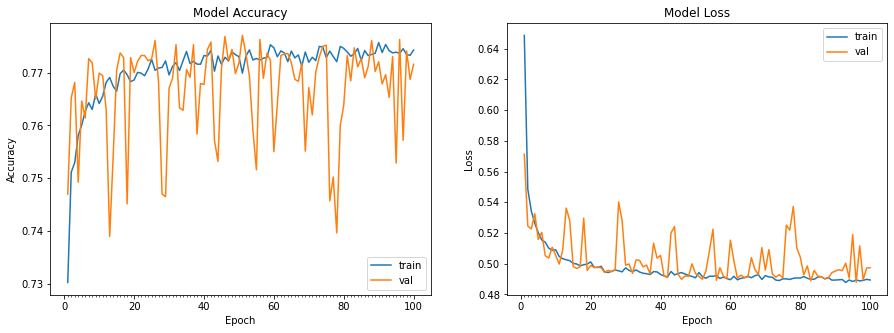

In [130]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/1000)
    axs[0].legend(['train', 'val'], loc='best')

    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/1000)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(model_info)

In [131]:
test_predictions = model.predict(normed_test_data)

print(test_predictions)

  


[[0.44001287]
 [0.2869881 ]
 [0.2649619 ]
 ...
 [0.5195394 ]
 [0.5456949 ]
 [0.5294496 ]]


In [132]:
final_pred = []
for i in range(0,len(test_predictions)):
  if test_predictions[i]>0.5:
    final_pred.append(1);
  else:
    final_pred.append(0)

print(final_pred)   



[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 

In [133]:
count1 = 0
count0 =0

for values in final_pred:
  if values == 1:
    count1 = count1+1
  else:
    count0 = count0 + 1 

print(count1,count0)


6760 5991


In [134]:

op = pd.DataFrame(test["Id"])

op["OP"] = final_pred

op.set_index('Id')   


op.columns =['Id', 'OP']

op[op.columns[0]] = op[op.columns[0]].astype("Int64")

op.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12751 entries, 0 to 12750
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      12751 non-null  Int64
 1   OP      12751 non-null  int64
dtypes: Int64(1), int64(1)
memory usage: 211.8 KB


In [135]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


NameError: ignored

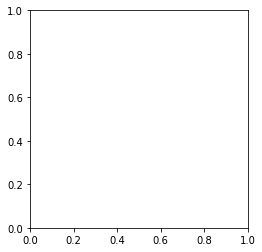

In [136]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 5000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = test_predictions - test_labels

In [ ]:
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")